### Code Hist.

 - CODE  
    &ensp; : Crawling - 특일 정보 조회 (KASI)

  - DATE  
    &ensp; 2023-11-29 Created  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 1)   
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 2)   
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 3)   
    
 - DESC  
    &ensp; : 전처리 - 한국지역난방공사 열판매량/열공급량   
    &emsp; 1) 결측치가 없어서, 그대로 사용  
    &emsp;&ensp;&ensp; 
    &emsp;&ensp;&ensp; (Crawl Code 없음)   
    &emsp; 2) 

 - DATA  
    &emsp; <"Input">  
    1) None (Input Dataset)  
    &emsp;- Period :   
    &emsp;- Interval : 

    &emsp; <"Output">  
    1) Hourly (관측소/년도별 출력)  
    &nbsp;df_data_cal.to_csv(data_dir + 'KASI_DATE_D_Final.csv', index = False, encoding='utf-8-sig')  
    &emsp;- Columns : ['YEAR', 'MONTH', 'DAY'  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;, 'dateKind', 'code_day_of_the_week', 'day_of_the_week'  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;, 'rest_YN', 'name_of_holiday', 'dist_from_holiday']
    &emsp;- Period :   
    &emsp;- Interval :  
    
    2) Daily (관측소/년도별 출력)  
    &nbsp;df_data_cal_24.to_csv(data_dir + 'KASI_DATE_H_Final.csv', index = False, encoding='utf-8-sig')  
    &emsp;- Columns : ['locdate', 'YEAR', 'MONTH', 'DAY'  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;, 'dateKind', 'code_day_of_the_week', 'day_of_the_week'  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;, 'rest_YN', 'name_of_holiday', 'dist_from_holiday'  
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;, 'HOUR', 'MINUTE']
    &emsp;- Period :   
    &emsp;- Interval :  
    
    

 - Related Link  
    &ensp; : 

# 01. Code

## 01-01. Init

### 01-01-01. Init_Module Import

In [1]:
#region Basic_Import
## Basic
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import random
from pandas import DataFrame, Series

## Datetime
import time
import datetime as dt
from datetime import datetime, date, timedelta

import glob
from glob import glob
import requests
import json

## 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

from scipy import stats

## TSNE
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

## 정규화
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
## Modeling, Model Training
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
## Model 평가
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score   # model.score   

## Excel/CSV
import openpyxl, xlrd

import urllib
from urllib.request import urlopen
from urllib.parse import urlencode, unquote, quote_plus

from selenium import webdriver
from selenium.webdriver.chrome.service import Service

from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

## Init.
pd.options.display.float_format = '{:.10f}'.format
#endregion Basic_Import

In [2]:
## Import_DL
str_tar = "tf"
## For Torch
if str_tar == "torch":
    import torch
    import torch.nn as nn
    from torch.nn.utils import weight_norm
    print("Torch Imported")
## For TF
elif str_tar == "tf":
    import tensorflow as tf
    import tensorflow_addons as tfa
    print("Tensorflow Imported")
else:
    print("Error : Cannot be used except for Keywords")
    print(" : torch / tf")

Tensorflow Imported


In [3]:
## Import_Local (현재 프로그램에서 미사용)
from DEV_Common_Data_Visualization import visualization_df

### 01-01-02. Config (Directory, Params)

In [4]:
## Init_config
SEED = 42

np.random.seed(SEED)
tf.random.set_seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = "1"
random.seed(SEED)

In [5]:
## Define Todate str
str_now_ymd = pd.datetime.now().date()
str_now_y = pd.datetime.now().year
str_now_m = pd.datetime.now().month
str_now_d = pd.datetime.now().day
str_now_hr = pd.datetime.now().hour
str_now_min = pd.datetime.now().minute

print(pd.datetime.now())
print(str(str_now_y) + " / " + str(str_now_m)  + " / " + str(str_now_d))
print(str(str_now_hr) + " : " + str(str_now_min))

2023-12-01 17:55:50.434985
2023 / 12 / 1
17 : 55


## 01-02. Data Load (df_raw)

### 01-02-01. KDHC Heat Usage

In [6]:
# Define data root directory
str_dir_kdhcHeat = "./data_Energy_KDHC_National_Heat/"
print(os.listdir(str_dir_kdhcHeat))

str_region = "KANGNAM"

df_kdhc_heat = pd.read_csv(str_dir_kdhcHeat + "KDHC_COMB_" + str_region + "HEATxWEATHER_2019-2022.csv", index_col = 0)
df_kdhc_heat

['DATA_KDHC_Heat_Provide_Cheongju_2010_2021.csv', 'DATA_KDHC_Heat_Provide_Cheongju_2010_2021_1st_Check.csv', 'DATA_KDHC_Heat_Provide_Sejong_2014_2018.csv', 'DATA_KDHC_Heat_Provide_Sejong_2014_2018_1st_Check.csv', 'DATA_KDHC_Heat_Sell_Branch_201910_202109.csv', 'KDHC_COMB_HEATxWEATHER_2019-2022.csv', 'KDHC_COMB_HEATxWEATHER_2019-2022_complete_analysis.csv', 'KDHC_COMB_HEATxWEATHER_2019-2022_linearReg.csv', 'KDHC_COMB_HEATxWEATHER_2019-2022_mean_imp.csv', 'KDHC_COMB_KANGNAMHEATxWEATHER_2019-2022.csv', 'KDHC_NATIONAL_HEAT_hr.csv', 'KDHC_NATIONAL_HEAT_RAW_hr.csv']


,METER_DATE,day_of_the_week_x,YEAR,MONTH,DAY,HOUR,MINUTE,code_day_of_the_week,day_of_the_week_y,rest_YN,...,wind_direction,pressure_vapor,pressure_area,pressure_sea,sunshine,solar_radiation,cloud_total,cloud_midlow,visual_range,KANGNAM
0,2019-10-01 01:00:00,Tuesday,2019,10,1,1,0,1,Tuesday,0,...,0.0000000000,19.5000000000,1013.2000000000,1017.9000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,455.0000000000,61.3000000000
1,2019-10-01 01:00:00,Tuesday,2019,10,1,1,0,1,Tuesday,0,...,0.0000000000,19.5000000000,1013.2000000000,1017.9000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,455.0000000000,61.3000000000
2,2019-10-01 02:00:00,Tuesday,2019,10,1,2,0,1,Tuesday,0,...,320.0000000000,19.4000000000,1013.1000000000,1017.8000000000,0.0000000000,0.0000000000,2.0000000000,0.0000000000,336.0000000000,61.3000000000
3,2019-10-01 02:00:00,Tuesday,2019,10,1,2,0,1,Tuesday,0,...,320.0000000000,19.4000000000,1013.1000000000,1017.8000000000,0.0000000000,0.0000000000,2.0000000000,0.0000000000,336.0000000000,61.3000000000
4,2019-10-01 03:00:00,Tuesday,2019,10,1,3,0,1,Tuesday,0,...,0.0000000000,18.5000000000,1013.0000000000,1017.7000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,391.0000000000,56.3000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27298,2022-09-30 20:00:00,Friday,2022,9,30,20,0,4,Friday,0,...,250.0000000000,19.7000000000,1011.9000000000,1016.5000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,320.0000000000,120.0000000000
27299,2022-09-30 21:00:00,Friday,2022,9,30,21,0,4,Friday,0,...,250.0000000000,19.9000000000,1012.2000000000,1016.9000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,257.0000000000,112.0000000000
27300,2022-09-30 22:00:00,Friday,2022,9,30,22,0,4,Friday,0,...,250.0000000000,19.6000000000,1012.4000000000,1017.1000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,277.0000000000,95.0000000000
27301,2022-09-30 23:00:00,Friday,2022,9,30,23,0,4,Friday,0,...,230.0000000000,19.4000000000,1012.4000000000,1017.1000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,237.0000000000,89.0000000000


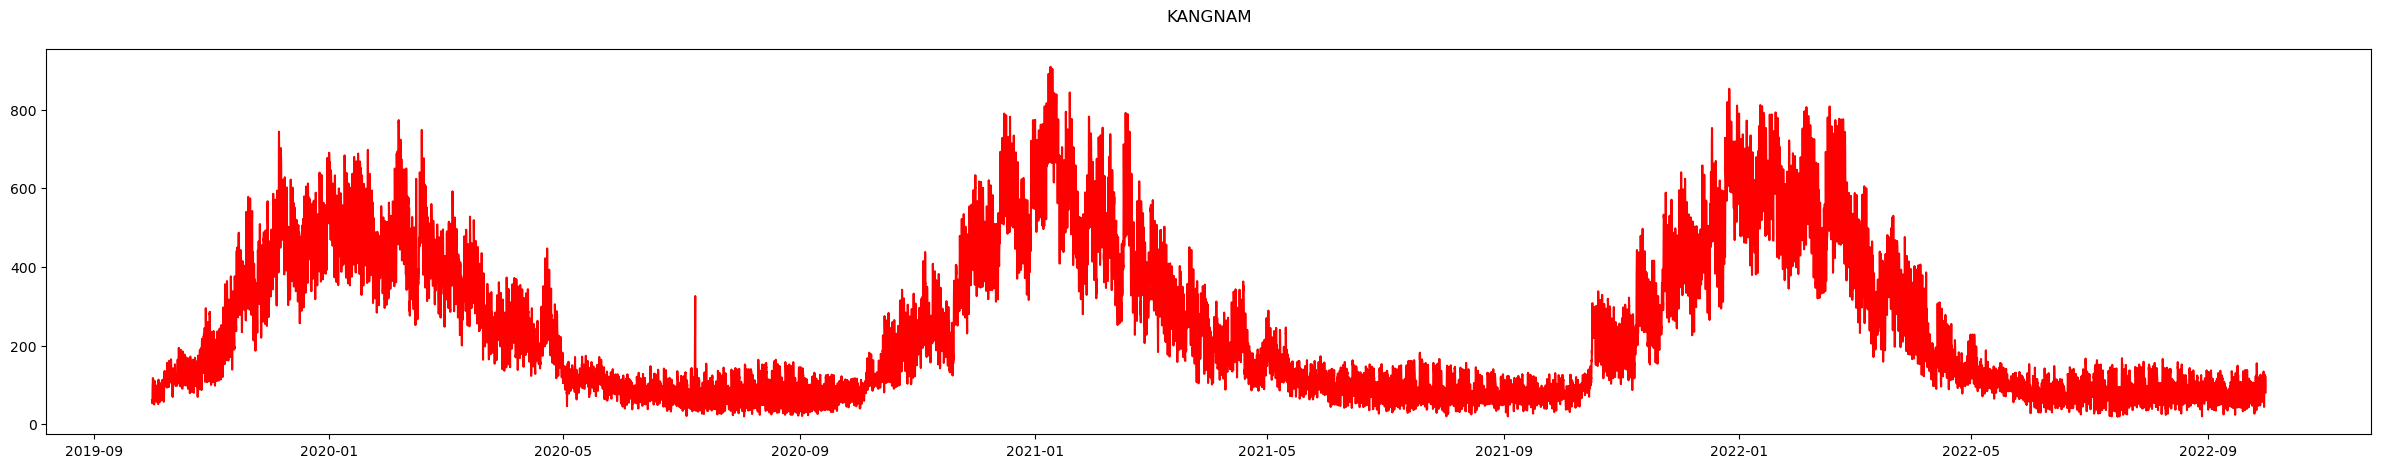

In [7]:
df_kdhc_heat = df_kdhc_heat[['METER_DATE', 'YEAR', 'MONTH', 'DAY', 'code_day_of_the_week', 'rest_YN', 'dist_from_holiday'
                             , 'HOUR', 'MINUTE'
                             , 'temp_outdoor', 'temp_dew_point', 'temp_ground'
                             , 'humidity'
                             , 'rainfall', 'snowfall', 'snowfall_3hr'
                             , 'wind_speed', 'wind_direction'
                             , 'pressure_vapor', 'pressure_area', 'pressure_sea'
                             , 'sunshine', 'solar_radiation'
                             , 'cloud_total', 'cloud_midlow'
                             , 'visual_range'
                             , 'KANGNAM']]
visualization_df(df_kdhc_heat, 'KANGNAM')

In [8]:
df_kdhc_heat_WD = df_kdhc_heat[df_kdhc_heat['rest_YN'] == '0']
print(df_kdhc_heat_WD.shape)
df_kdhc_heat_WE = df_kdhc_heat[df_kdhc_heat['rest_YN'] == '1']
print(df_kdhc_heat_WE.shape)

(18542, 27)
(8737, 27)


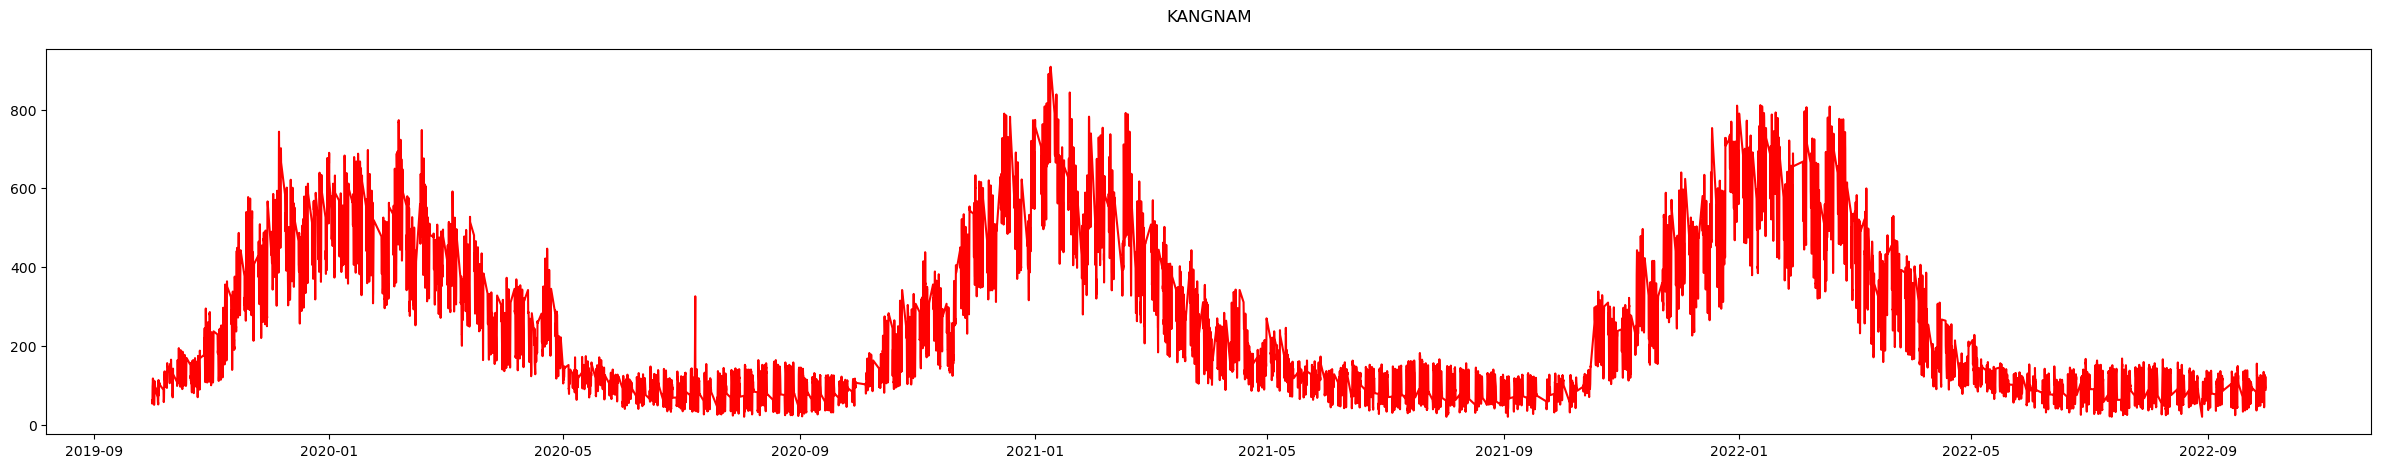

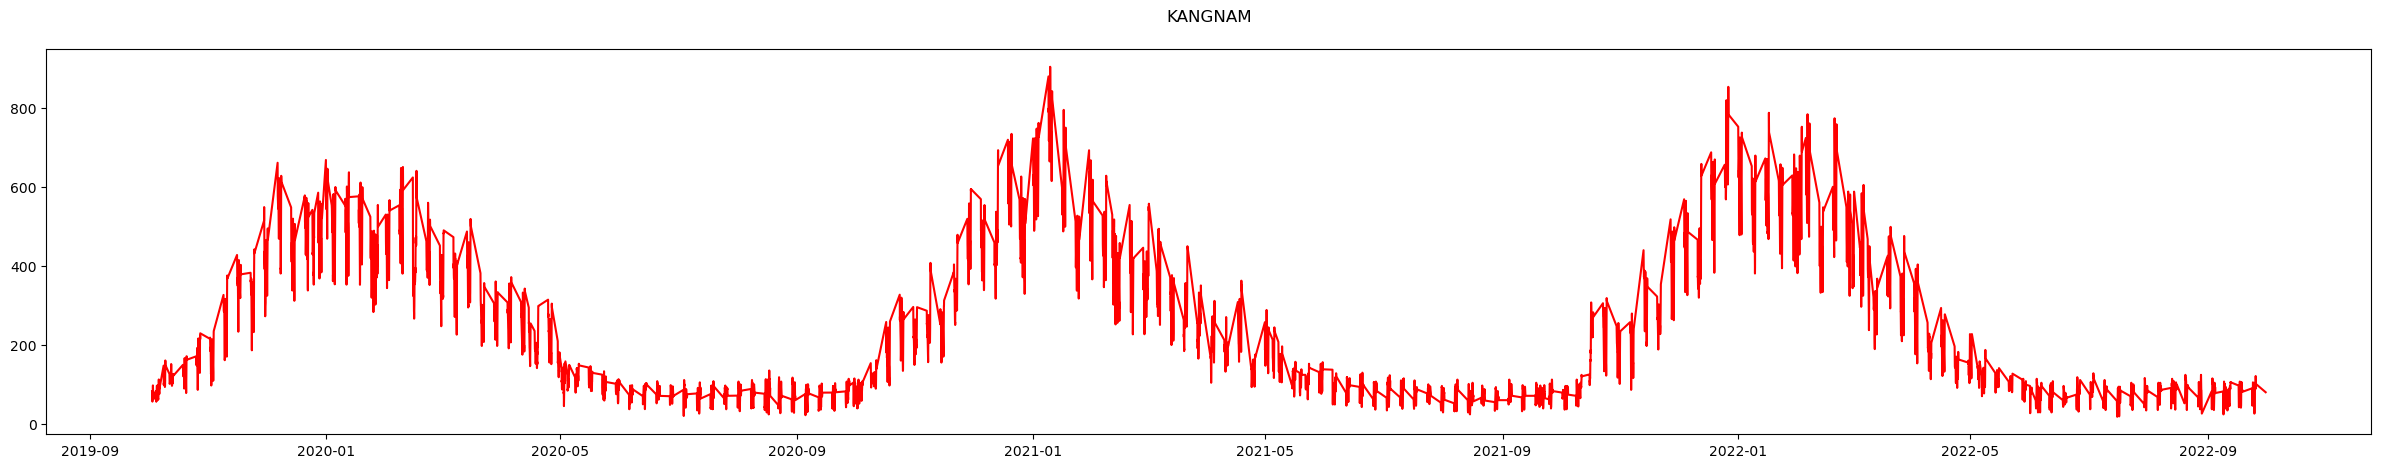

In [9]:
visualization_df(df_kdhc_heat_WD, 'KANGNAM')
visualization_df(df_kdhc_heat_WE, 'KANGNAM')